This workbook demonstrates Auto-ARIMA, a function within the ARIMA timeseries statsmodels package. This is only used here with a univariate approach. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib 
import scipy 
import sklearn

from statsmodels.tsa.api import (kpss, adfuller,seasonal_decompose, STL)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff

from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from pathlib import Path
import statsmodels as sm
from pathlib import Path
import seaborn as sns
import statsmodels.api
import warnings

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12, 5] 



In [23]:
from pmdarima.arima import auto_arima
import pmdarima as pm

In [36]:
milk = pd.read_csv('/Users/paul.carroll/Github/Forecasting/data/monthlymilkproductionpounds.csv', index_col = 'Month', parse_dates=True)
rename_map = {'Monthly milk production: pounds per cow. Jan 62 ? Dec 75':'prod'}

milk.rename(columns=rename_map, inplace=True)
milk= milk.iloc[0:168]

In [37]:
train, test = pm.model_selection.train_test_split(milk,test_size=0.2)
print(f'Train: {train.size}')
print(f'Test: {test.shape}')

Train: 134
Test: (34, 1)


In [51]:
auto_m = pm.auto_arima(train,
                       seasonal =True,
                       m = 12,
                       test = 'adf',
                       information_criterion = 'bic',
                       stepwise=True,
                       trace=True)
auto_m.summary()

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=867.897, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=889.081, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=864.993, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=852.055, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=882.720, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=856.840, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=856.837, Time=0.61 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=865.686, Time=0.04 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=856.506, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=856.463, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=855.981, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=851.923, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=882.699, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  134
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -418.768
Date:                              Wed, 14 Sep 2022   AIC                            843.536
Time:                                      11:40:11   BIC                            851.923
Sample:                                  01-01-1962   HQIC                           846.942
                                       - 02-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2749      0.091     -3.015      0.003      -0.454      -0.096
ma.S.L12      -0.6262      0.090     -6.995      0.000      -0.802      -0.451
sigma2        56.4852      6.057      9.326      0.000      44.615      68.356
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                38.27
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.85
Prob(H) (two-sided):                  0.57   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

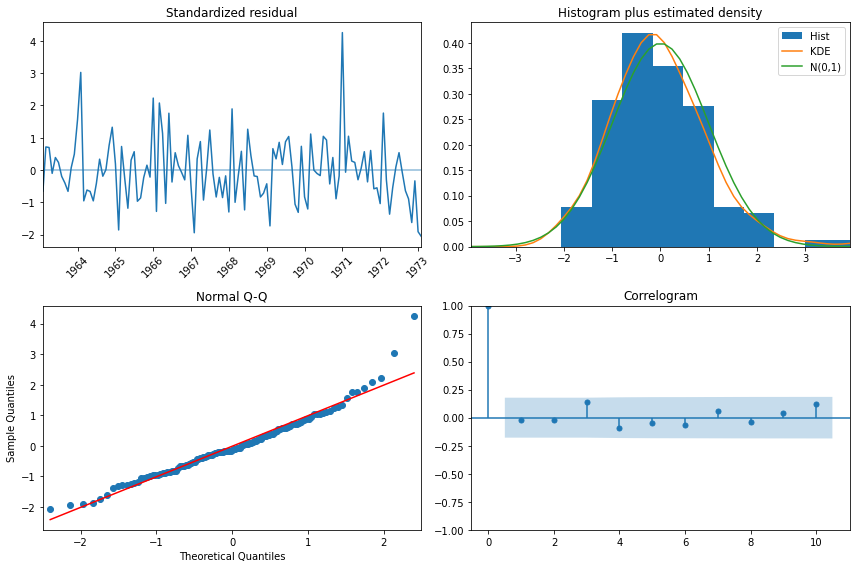

In [42]:
diag_plot = auto_m.plot_diagnostics(figsize=(12,8))
diag_plot.axes[0].tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.show()

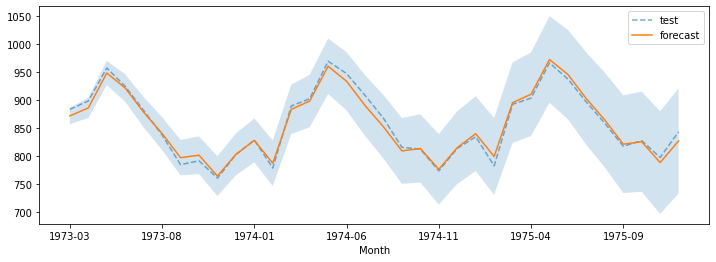

In [47]:
n = test.shape[0]
forecast, conf_interval = auto_m.predict(n_periods=n, return_conf_int=True)
lower_ci, upper_ci=zip(*conf_interval)
index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast, index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()